<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/HClustering_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
file_path = "/content/drive/MyDrive/datamining/Utilities.csv"
utilities_df = pd.read_csv(file_path)
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


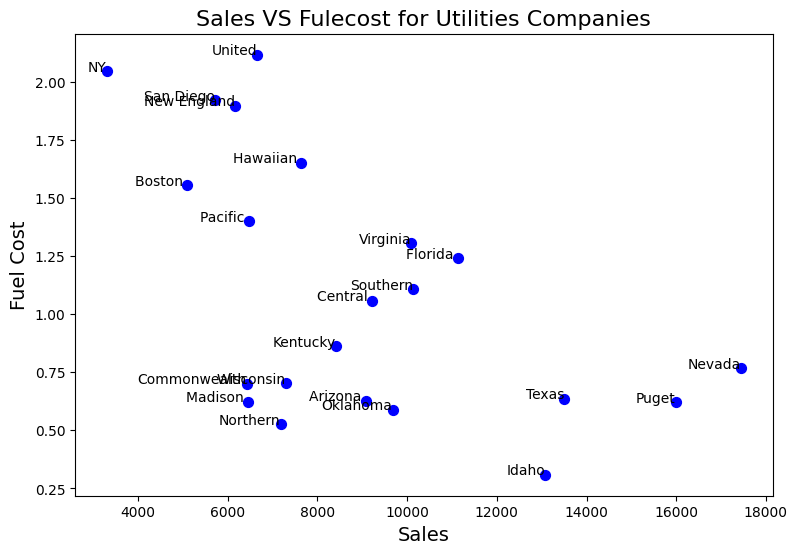

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize =(9,6))
plt.scatter(utilities_df['Sales'], utilities_df['Fuel_Cost'], color= 'blue', s =50)


for index, row in utilities_df.iterrows():
  plt.annotate(row['Company'],(row['Sales'], row['Fuel_Cost']),fontsize = 10, ha = 'right')

plt.title('Sales VS Fulecost for Utilities Companies', fontsize =16)
plt.xlabel('Sales', fontsize = 14)
plt.ylabel('Fuel Cost', fontsize = 14)
plt.show()

In [22]:
from sklearn.metrics import pairwise_distances

numerical_data = utilities_df.select_dtypes(include =['float64','int64'])
distances = pairwise_distances(numerical_data, metric ='euclidean')

distance_df = pd.DataFrame(distances, index = utilities_df['Company'], columns =  utilities_df['Company'])

distance_df.head(10)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


In [24]:
utilites_df_norm =(numerical_data - numerical_data.mean())/numerical_data.std()

distances_scaled = pairwise_distances(utilites_df_norm, metric ='euclidean')

scaled_distance_df = pd.DataFrame(distances_scaled, index = utilities_df['Company'], columns =  utilities_df['Company'])

scaled_distance_df.head(10)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3.096154,3.679230,2.462149,4.123129,3.606269,3.901898,2.737407,3.253851,3.099116,...,3.959637,2.113490,2.593481,4.033051,4.396680,1.877248,2.410434,3.174488,3.453407,2.509287
Boston,3.096154,0.000000,4.916465,2.164213,3.852850,4.218804,3.448346,3.892524,3.957125,2.705330,...,3.434878,4.323825,2.501195,4.837051,3.623588,2.904409,4.634878,2.997481,2.318451,2.421916
Central,3.679230,4.916465,0.000000,4.107079,4.468735,2.992760,4.217769,4.990876,2.752623,3.934935,...,4.385973,2.742000,5.156977,5.264442,6.356548,2.723954,3.179392,3.733274,5.088018,4.109321
Commonwealth,2.462149,2.164213,4.107079,0.000000,4.127368,3.201836,3.969367,3.692949,3.753627,1.491427,...,2.577003,3.230069,3.190250,4.967244,4.893679,2.651532,3.464171,1.816465,3.884260,2.578463
NY,4.123129,3.852850,4.468735,4.127368,0.000000,4.600183,4.596261,5.155516,4.489900,4.045276,...,4.758059,4.818803,4.255251,5.816715,5.628591,4.338150,5.133791,4.385852,3.644137,3.771757
Florida,3.606269,4.218804,2.992760,3.201836,4.600183,0.000000,3.352919,4.913953,3.730814,3.829058,...,4.554909,3.469268,4.065764,5.842268,6.099456,2.853942,2.581208,2.912401,4.628341,4.026935
Hawaiian,3.901898,3.448346,4.217769,3.969367,4.596261,3.352919,0.000000,4.364509,2.796298,4.506512,...,5.010221,4.914949,2.930142,5.042444,4.577294,2.949006,4.515428,3.541931,2.675404,4.000096
Idaho,2.737407,3.892524,4.990876,3.692949,5.155516,4.913953,4.364509,0.000000,3.594824,3.673884,...,4.140607,4.335241,3.849872,2.201457,5.426511,3.237409,4.107966,4.094283,3.977130,3.239374
Kentucky,3.253851,3.957125,2.752623,3.753627,4.489900,3.730814,2.796298,3.594824,0.000000,3.572023,...,3.658647,3.816443,4.113606,3.627307,4.901037,2.428533,4.109049,2.948021,3.742680,3.208932


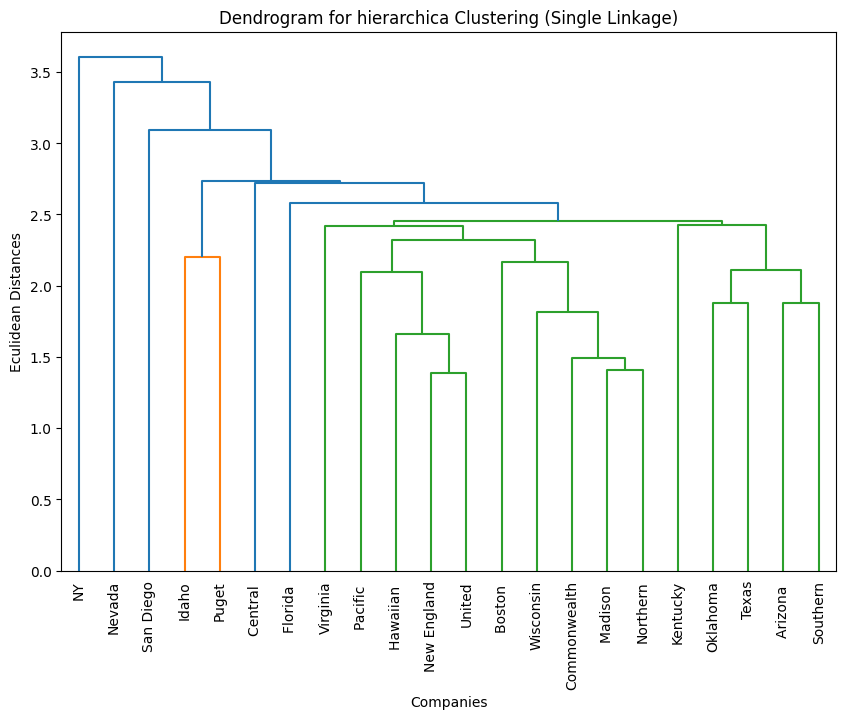

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

 #Perform Hierarchical Clustering using Single Linkage Method
Z= linkage(utilites_df_norm, method= 'single')
#Plot Dendrogram
plt.figure(figsize = (10,7))
dendrogram = dendrogram(Z, labels= utilities_df['Company'].values, orientation='top', leaf_rotation= 90, leaf_font_size= 10)

plt.title('Dendrogram for hierarchica Clustering (Single Linkage)')
plt.xlabel('Companies')
plt.ylabel('Eculidean Distances')
plt.show()

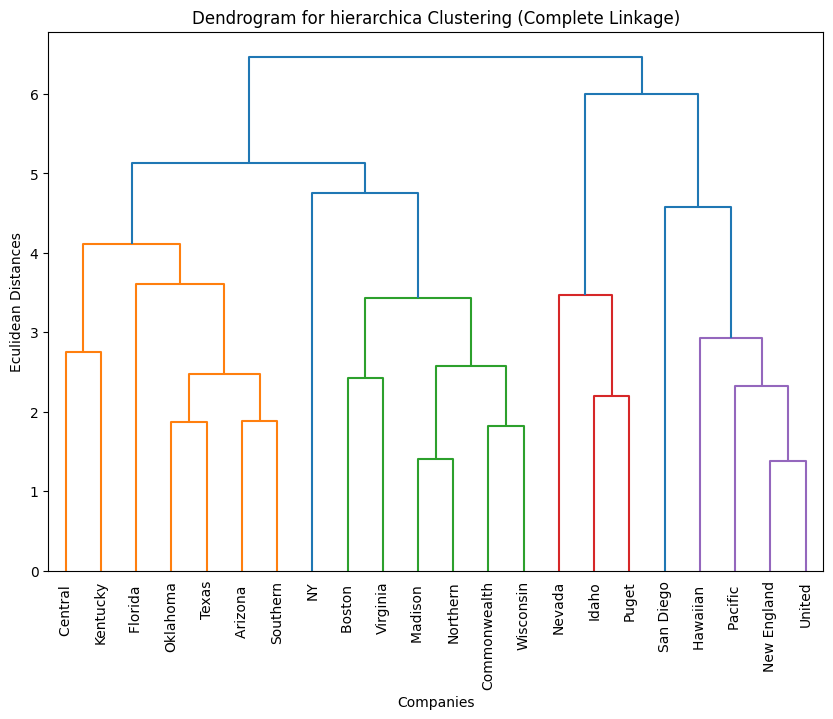

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

 #Perform Hierarchical Clustering using complete Linkage Method
Z= linkage(utilites_df_norm, method= 'complete')
#Plot Dendrogram
plt.figure(figsize = (10,7))
dendrogram = dendrogram(Z, labels= utilities_df['Company'].values, orientation='top', leaf_rotation= 90, leaf_font_size= 10)

plt.title('Dendrogram for hierarchica Clustering (Complete Linkage)')
plt.xlabel('Companies')
plt.ylabel('Eculidean Distances')
plt.show()